# Car Insurance Modeling


### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data as dataframe
df = pd.read_csv("Car_insurance_clean+EDA.csv",index_col=0)

In [3]:
df.head()

,AGE,DRIVING_EXPERIENCE,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,GENDER,VEHICLE_YEAR(before 2015),VEHICLE_TYPE(sports car)
0,3,0,0.629027,1.0,0.0,12.0,0,0,0,0.0,0,0,0
1,0,0,0.357757,0.0,0.0,16.0,0,0,0,1.0,1,1,0
2,0,0,0.493146,1.0,0.0,11.0,0,0,0,0.0,0,1,0
3,0,0,0.206013,1.0,0.0,11.0,0,0,0,0.0,1,1,0
4,1,1,0.388366,1.0,0.0,12.0,2,0,1,1.0,1,1,0


In [4]:
df.columns

Index(['AGE', 'DRIVING_EXPERIENCE', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP',
       'MARRIED', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'OUTCOME', 'GENDER', 'VEHICLE_YEAR(before 2015)',
       'VEHICLE_TYPE(sports car)'],
      dtype='object')

## Split the Data

In [5]:
#Take the 6 best Feauters
from sklearn.model_selection import train_test_split
X, y = df.drop(['OUTCOME','CREDIT_SCORE','MARRIED','ANNUAL_MILEAGE','GENDER','VEHICLE_YEAR(before 2015)', 'VEHICLE_TYPE(sports car)'],axis=1), df['OUTCOME']


In [6]:
X.head()

,AGE,DRIVING_EXPERIENCE,VEHICLE_OWNERSHIP,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,3,0,1.0,0,0,0
1,0,0,0.0,0,0,0
2,0,0,1.0,0,0,0
3,0,0,1.0,0,0,0
4,1,1,1.0,2,0,1


In [7]:
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Split data into 80% train and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=42)

<AxesSubplot:>

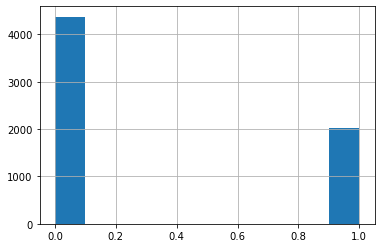

In [9]:
y_train.hist()

### Handling the Imbalancing 

In [10]:
#Data befor over sampling
y_train.value_counts()

0.0    4373
1.0    2027
Name: OUTCOME, dtype: int64

In [11]:
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 2, 0 : n_neg}

In [12]:
import imblearn.over_sampling
smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, random_state = 42)
    
X_tr_smote, y_tr_smote = smote.fit_resample(X_train, y_train)

In [13]:
#Data after over sampling
y_tr_smote.value_counts()

0.0    4373
1.0    4054
Name: OUTCOME, dtype: int64

<AxesSubplot:>

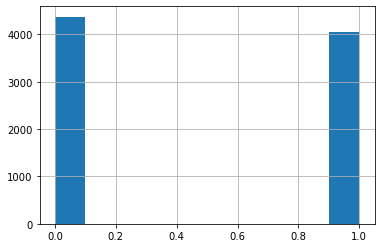

In [14]:
y_tr_smote.hist()

### Standard Scaling of data

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_tr_smote)
X_val_scaled=sc.transform(X_val)

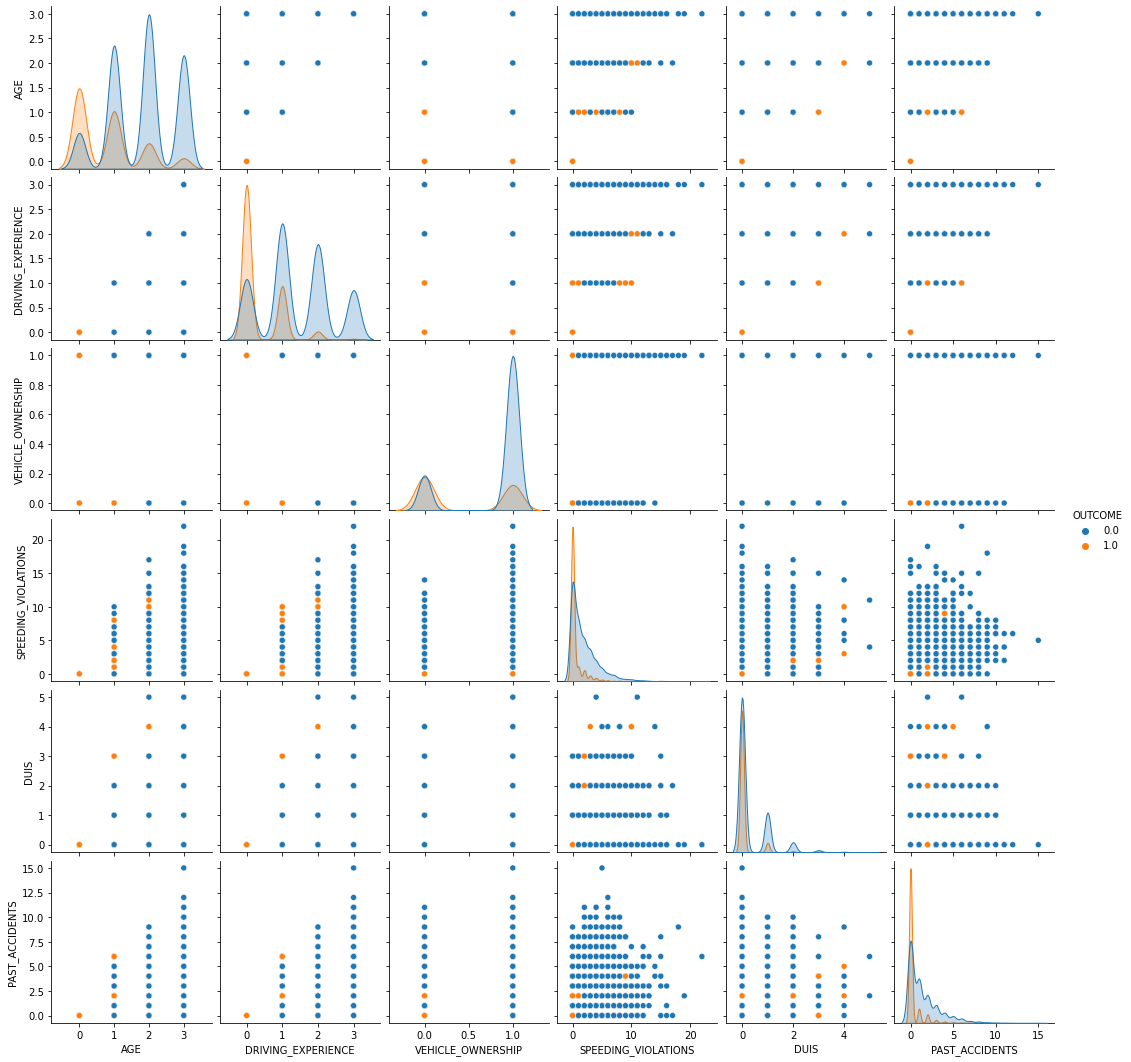

In [16]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), hue='OUTCOME');

## Modeling

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
#import lightgbm as ltb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score


In [18]:
def accuracy(actuals, preds):
    return np.mean(actuals == preds)

def precision(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fp = np.sum((actuals == 0) & (preds == 1))
    return tp / (tp + fp)

def recall(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fn = np.sum((actuals == 1) & (preds == 0))
    return tp / (tp + fn)

def F1(actuals, preds):
    p, r = precision(actuals, preds), recall(actuals, preds)
    return 2*p*r / (p + r)

### Logistic Regression

In [19]:
lr_c=LogisticRegression(random_state=42, solver='lbfgs',max_iter=400 )
lr_c.fit(X_tr_smote, y_tr_smote)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('Accuracy on training set:',lr_c.score(X_tr_smote, y_tr_smote))
print('Accuracy on validation set:',lr_c.score(X_val,y_val))

Accuracy on training set: 0.8025394565088406
Accuracy on validation set: 0.764375


Confusion Matrix for Logistic Regression Classifier 



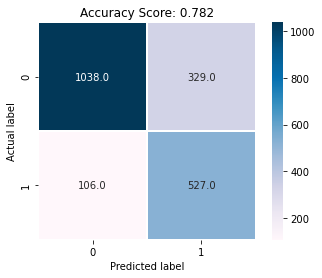

In [20]:
#Confusion matrix for logistic regression model
print("Confusion Matrix for Logistic Regression Classifier","\n")
score = round(accuracy_score(y_test, lr_pred),3) 
cm1 = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [21]:
print('Logistic Regression validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, lr_c.predict(X_test)), 
         precision(y_test, lr_c.predict(X_test)), 
         recall(y_test, lr_c.predict(X_test)),
         F1(y_test, lr_c.predict(X_test))
        )
     )

Logistic Regression validation metrics: 
 Accuracy: 0.7825 
 Precision: 0.6157 
 Recall: 0.8325 
 F1: 0.7079


### Random Forest Classifier

In [22]:
rf_clf = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf_clf.fit(X_tr_smote, y_tr_smote)
rf_pred=rf_clf.predict(X_test)
rf_ac=accuracy_score(y_test, rf_pred)
print('Accuracy on training set:',rf_clf.score(X_tr_smote, y_tr_smote))
print('Accuracy on validation set:',rf_clf.score(X_val,y_val))

Accuracy on training set: 0.8210513824611368
Accuracy on validation set: 0.75125


In [23]:
print('Random Forest Classifier: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, rf_clf.predict(X_test)), 
         precision(y_test, rf_clf.predict(X_test)), 
         recall(y_test, rf_clf.predict(X_test)),
         F1(y_test, rf_clf.predict(X_test))
        )
     )

Random Forest Classifier: 
 Accuracy: 0.7740 
 Precision: 0.6044 
 Recall: 0.8278 
 F1: 0.6987


### Decision Tree Classifier

In [24]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_tr_smote, y_tr_smote)

#Predict the response for test dataset
clf_pred = clf.predict(X_test)
clf_ac=accuracy_score(y_test, clf_pred)
print('Accuracy on training set:',clf.score(X_tr_smote, y_tr_smote))
print('Accuracy on validation set:',clf.score(X_val,y_val))

Accuracy on training set: 0.8218820458051501
Accuracy on validation set: 0.750625


In [25]:
print('Decision Tree: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, clf.predict(X_test)), 
         precision(y_test, clf.predict(X_test)), 
         recall(y_test, clf.predict(X_test)),
         F1(y_test, clf.predict(X_test))
        )
     )

Decision Tree: 
 Accuracy: 0.7735 
 Precision: 0.6037 
 Recall: 0.8278 
 F1: 0.6982


### Support Vector Classifier

In [26]:
svc_r=SVC(kernel='rbf', random_state=0, probability=True)
svc_r.fit(X_tr_smote, y_tr_smote)
svr_pred=svc_r.predict(X_test)
svr_ac=accuracy_score(y_test, svr_pred)
svr_val=svc_r.score(X_val,y_val)
pred_prob1 = svc_r.predict_proba(X_test)
print('Accuracy of training set: ', svr_ac)
print('Accuracy of training set: ', svr_val)


Accuracy of training set:  0.7695
Accuracy of training set:  0.75125


In [27]:
print('Support Vector Classifier: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, svc_r.predict(X_test)), 
         precision(y_test, svc_r.predict(X_test)), 
         recall(y_test, svc_r.predict(X_test)),
         F1(y_test, svc_r.predict(X_test))
        )
     )

Support Vector Classifier: 
 Accuracy: 0.7695 
 Precision: 0.5962 
 Recall: 0.8420 
 F1: 0.6981


### K-nearest nieghbours


In [28]:
knn = KNeighborsClassifier()
knn.fit(X_tr_smote, y_tr_smote)
knn_pred = knn.predict(X_test)
knn_val=clf.score(X_val,y_val)
knn_ac=accuracy_score(y_test, knn_pred)
print('Accuracy on training set:',knn.score(X_tr_smote, y_tr_smote))
print('Accuracy on validation set:',knn.score(X_val,y_val))

Accuracy on training set: 0.7344250622997508
Accuracy on validation set: 0.768125


In [29]:
print('K-nearest nieghbours: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, knn.predict(X_test)), 
         precision(y_test, knn.predict(X_test)), 
         recall(y_test, knn.predict(X_test)),
         F1(y_test, knn.predict(X_test))
        )
     )

K-nearest nieghbours: 
 Accuracy: 0.7575 
 Precision: 0.6555 
 Recall: 0.4929 
 F1: 0.5627


### Ada Boost Classifier

In [30]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
abc.fit(X_tr_smote, y_tr_smote)

#Predict the response for test dataset
abc_pred = abc.predict(X_test)
abc_ac=accuracy_score(y_test, abc_pred)
print('Accuracy on training set:',abc.score(X_tr_smote, y_tr_smote))
print('Accuracy on validation set:',abc.score(X_val,y_val))

Accuracy on training set: 0.8027767888928444
Accuracy on validation set: 0.761875


In [31]:
print('Ada Boost Classifier: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, abc.predict(X_test)), 
         precision(y_test, abc.predict(X_test)), 
         recall(y_test, abc.predict(X_test)),
         F1(y_test, abc.predict(X_test))
        )
     )

Ada Boost Classifier: 
 Accuracy: 0.7825 
 Precision: 0.6170 
 Recall: 0.8246 
 F1: 0.7059


### Gradient Boosting Classifier

In [32]:
gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=3,
                               learning_rate=.71)
gb_clf.fit(X_tr_smote, y_tr_smote)
gb_clf_pred = gb_clf.predict(X_test)
gb_clf_ac=accuracy_score(y_test, gb_clf_pred)
print("Accuracy score (training):" ,gb_clf.score(X_tr_smote, y_tr_smote))
print("Accuracy score (validation):",(gb_clf.score(X_val, y_val)))

Accuracy score (training): 0.8148807404770381
Accuracy score (validation): 0.75625


In [33]:
print('Gradient Boosting Classifier: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, gb_clf.predict(X_test)), 
         precision(y_test, gb_clf.predict(X_test)), 
         recall(y_test, gb_clf.predict(X_test)),
         F1(y_test, gb_clf.predict(X_test))
        )
     )

Gradient Boosting Classifier: 
 Accuracy: 0.7775 
 Precision: 0.6111 
 Recall: 0.8167 
 F1: 0.6991


### XG Boost Classifier

In [34]:
#!pip install xgboost

In [35]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_tr_smote, y_tr_smote)
xgb_clf_pred = xgb_clf.predict(X_test)
xgb_clf_ac=accuracy_score(y_test, xgb_clf_pred)
print("Accuracy score (training):" ,xgb_clf.score(X_tr_smote, y_tr_smote))
print("Accuracy score (validation):",(xgb_clf.score(X_val, y_val)))

C:\Users\amira\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score (training): 0.8183220600450931
Accuracy score (validation): 0.75375


In [36]:
print('XG Boost Classifier: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, xgb_clf.predict(X_test)), 
         precision(y_test, xgb_clf.predict(X_test)), 
         recall(y_test, xgb_clf.predict(X_test)),
         F1(y_test, xgb_clf.predict(X_test))
        )
     )

XG Boost Classifier: 
 Accuracy: 0.7765 
 Precision: 0.6089 
 Recall: 0.8215 
 F1: 0.6994


### Cat Boost Regressor

In [37]:
#!pip install catboost

In [38]:
from catboost import CatBoostClassifier
cbr = CatBoostClassifier()
# Fit model
cbr.fit(X_tr_smote, y_tr_smote)
# Get predictions
cbr_pred = cbr.predict(X_test)
cbr_ac=accuracy_score(y_test, cbr_pred)


print("Accuracy score (training):" ,cbr.score(X_tr_smote, y_tr_smote))
print("Accuracy score (validation):",(cbr.score(X_val, y_val)))

Learning rate set to 0.025597
0:	learn: 0.6774544	total: 145ms	remaining: 2m 24s
1:	learn: 0.6626831	total: 151ms	remaining: 1m 15s
2:	learn: 0.6480755	total: 156ms	remaining: 51.7s
3:	learn: 0.6352224	total: 160ms	remaining: 39.8s
4:	learn: 0.6239728	total: 163ms	remaining: 32.5s
5:	learn: 0.6118475	total: 168ms	remaining: 27.9s
6:	learn: 0.6005062	total: 173ms	remaining: 24.5s
7:	learn: 0.5902376	total: 178ms	remaining: 22s
8:	learn: 0.5811562	total: 182ms	remaining: 20.1s
9:	learn: 0.5727503	total: 187ms	remaining: 18.5s
10:	learn: 0.5640737	total: 192ms	remaining: 17.2s
11:	learn: 0.5566668	total: 196ms	remaining: 16.1s
12:	learn: 0.5492258	total: 200ms	remaining: 15.2s
13:	learn: 0.5424645	total: 204ms	remaining: 14.4s
14:	learn: 0.5359838	total: 208ms	remaining: 13.6s
15:	learn: 0.5305720	total: 210ms	remaining: 12.9s
16:	learn: 0.5254352	total: 213ms	remaining: 12.3s
17:	learn: 0.5200151	total: 216ms	remaining: 11.8s
18:	learn: 0.5152987	total: 219ms	remaining: 11.3s
19:	learn: 

161:	learn: 0.4214614	total: 548ms	remaining: 2.83s
162:	learn: 0.4213911	total: 550ms	remaining: 2.83s
163:	learn: 0.4213494	total: 553ms	remaining: 2.82s
164:	learn: 0.4213049	total: 556ms	remaining: 2.81s
165:	learn: 0.4212395	total: 559ms	remaining: 2.81s
166:	learn: 0.4211969	total: 562ms	remaining: 2.8s
167:	learn: 0.4211036	total: 565ms	remaining: 2.8s
168:	learn: 0.4210559	total: 568ms	remaining: 2.79s
169:	learn: 0.4210329	total: 571ms	remaining: 2.79s
170:	learn: 0.4209573	total: 573ms	remaining: 2.78s
171:	learn: 0.4209060	total: 576ms	remaining: 2.77s
172:	learn: 0.4208774	total: 579ms	remaining: 2.77s
173:	learn: 0.4208281	total: 583ms	remaining: 2.77s
174:	learn: 0.4207149	total: 586ms	remaining: 2.76s
175:	learn: 0.4206425	total: 588ms	remaining: 2.75s
176:	learn: 0.4205604	total: 591ms	remaining: 2.75s
177:	learn: 0.4205042	total: 593ms	remaining: 2.74s
178:	learn: 0.4204610	total: 595ms	remaining: 2.73s
179:	learn: 0.4203225	total: 597ms	remaining: 2.72s
180:	learn: 0.

395:	learn: 0.4104696	total: 1.08s	remaining: 1.65s
396:	learn: 0.4104456	total: 1.08s	remaining: 1.64s
397:	learn: 0.4103792	total: 1.08s	remaining: 1.64s
398:	learn: 0.4102899	total: 1.09s	remaining: 1.64s
399:	learn: 0.4102769	total: 1.09s	remaining: 1.63s
400:	learn: 0.4102318	total: 1.09s	remaining: 1.63s
401:	learn: 0.4102091	total: 1.09s	remaining: 1.63s
402:	learn: 0.4101781	total: 1.1s	remaining: 1.63s
403:	learn: 0.4101201	total: 1.1s	remaining: 1.62s
404:	learn: 0.4101096	total: 1.1s	remaining: 1.62s
405:	learn: 0.4100682	total: 1.1s	remaining: 1.61s
406:	learn: 0.4100147	total: 1.11s	remaining: 1.61s
407:	learn: 0.4099097	total: 1.11s	remaining: 1.61s
408:	learn: 0.4098497	total: 1.11s	remaining: 1.6s
409:	learn: 0.4098111	total: 1.11s	remaining: 1.6s
410:	learn: 0.4097264	total: 1.11s	remaining: 1.6s
411:	learn: 0.4096501	total: 1.12s	remaining: 1.59s
412:	learn: 0.4095766	total: 1.12s	remaining: 1.59s
413:	learn: 0.4095226	total: 1.12s	remaining: 1.59s
414:	learn: 0.40948

631:	learn: 0.4013648	total: 1.62s	remaining: 944ms
632:	learn: 0.4013553	total: 1.62s	remaining: 941ms
633:	learn: 0.4013108	total: 1.63s	remaining: 939ms
634:	learn: 0.4013016	total: 1.63s	remaining: 936ms
635:	learn: 0.4012934	total: 1.63s	remaining: 934ms
636:	learn: 0.4012661	total: 1.63s	remaining: 931ms
637:	learn: 0.4012345	total: 1.64s	remaining: 929ms
638:	learn: 0.4011997	total: 1.64s	remaining: 926ms
639:	learn: 0.4011847	total: 1.64s	remaining: 923ms
640:	learn: 0.4011762	total: 1.64s	remaining: 920ms
641:	learn: 0.4011771	total: 1.65s	remaining: 918ms
642:	learn: 0.4011762	total: 1.65s	remaining: 915ms
643:	learn: 0.4011632	total: 1.65s	remaining: 912ms
644:	learn: 0.4011356	total: 1.65s	remaining: 909ms
645:	learn: 0.4011261	total: 1.65s	remaining: 907ms
646:	learn: 0.4011082	total: 1.66s	remaining: 904ms
647:	learn: 0.4010943	total: 1.66s	remaining: 901ms
648:	learn: 0.4010600	total: 1.66s	remaining: 898ms
649:	learn: 0.4010361	total: 1.66s	remaining: 896ms
650:	learn: 

789:	learn: 0.3978699	total: 1.98s	remaining: 525ms
790:	learn: 0.3978421	total: 1.98s	remaining: 523ms
791:	learn: 0.3978245	total: 1.98s	remaining: 520ms
792:	learn: 0.3977823	total: 1.98s	remaining: 518ms
793:	learn: 0.3977728	total: 1.99s	remaining: 515ms
794:	learn: 0.3977480	total: 1.99s	remaining: 513ms
795:	learn: 0.3977355	total: 1.99s	remaining: 511ms
796:	learn: 0.3977334	total: 1.99s	remaining: 508ms
797:	learn: 0.3977136	total: 2s	remaining: 505ms
798:	learn: 0.3976938	total: 2s	remaining: 503ms
799:	learn: 0.3976718	total: 2s	remaining: 500ms
800:	learn: 0.3976607	total: 2s	remaining: 498ms
801:	learn: 0.3976400	total: 2s	remaining: 495ms
802:	learn: 0.3975977	total: 2.01s	remaining: 493ms
803:	learn: 0.3975863	total: 2.01s	remaining: 490ms
804:	learn: 0.3975583	total: 2.01s	remaining: 487ms
805:	learn: 0.3975523	total: 2.01s	remaining: 485ms
806:	learn: 0.3975424	total: 2.02s	remaining: 482ms
807:	learn: 0.3975175	total: 2.02s	remaining: 480ms
808:	learn: 0.3975003	total

960:	learn: 0.3947996	total: 2.36s	remaining: 95.8ms
961:	learn: 0.3947916	total: 2.36s	remaining: 93.3ms
962:	learn: 0.3947718	total: 2.37s	remaining: 90.9ms
963:	learn: 0.3947608	total: 2.37s	remaining: 88.4ms
964:	learn: 0.3947479	total: 2.37s	remaining: 86ms
965:	learn: 0.3947401	total: 2.37s	remaining: 83.5ms
966:	learn: 0.3947314	total: 2.38s	remaining: 81.1ms
967:	learn: 0.3947151	total: 2.38s	remaining: 78.6ms
968:	learn: 0.3947076	total: 2.38s	remaining: 76.1ms
969:	learn: 0.3947008	total: 2.38s	remaining: 73.7ms
970:	learn: 0.3946755	total: 2.38s	remaining: 71.2ms
971:	learn: 0.3946684	total: 2.39s	remaining: 68.8ms
972:	learn: 0.3946558	total: 2.39s	remaining: 66.3ms
973:	learn: 0.3946494	total: 2.39s	remaining: 63.8ms
974:	learn: 0.3946444	total: 2.39s	remaining: 61.4ms
975:	learn: 0.3946207	total: 2.4s	remaining: 58.9ms
976:	learn: 0.3946193	total: 2.4s	remaining: 56.5ms
977:	learn: 0.3946104	total: 2.4s	remaining: 54ms
978:	learn: 0.3945989	total: 2.4s	remaining: 51.5ms
9

In [39]:
print('Cat Boost Classifier: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, cbr.predict(X_test)), 
         precision(y_test, cbr.predict(X_test)), 
         recall(y_test, cbr.predict(X_test)),
         F1(y_test, cbr.predict(X_test))
        )
     )

Cat Boost Classifier: 
 Accuracy: 0.7800 
 Precision: 0.6134 
 Recall: 0.8246 
 F1: 0.7035


## Voting Classifier

In [40]:
model_names = ["lr_c", "rf_clf", 'clf',"svc_r", "knn","abc","gb_clf","xgb_clf","cbr"]
model_var = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_var))
model_list

[('lr_c', LogisticRegression(max_iter=400, random_state=42)),
 ('rf_clf', RandomForestClassifier(n_estimators=10, random_state=42)),
 ('clf', DecisionTreeClassifier()),
 ('svc_r', SVC(probability=True, random_state=0)),
 ('knn', KNeighborsClassifier()),
 ('abc', AdaBoostClassifier(learning_rate=1)),
 ('gb_clf', GradientBoostingClassifier(learning_rate=0.71)),
 ('xgb_clf',
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                gamma=0, gpu_id=-1, importance_type=None,
                interaction_constraints='', learning_rate=0.300000012,
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=8,
                num_parallel_tree=1, predictor='auto', random_state=0,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                tree_method='exact', validate

In [41]:
for model_name in model_names:
    curr_model = eval(model_name)
    print(f'{model_name} score: {curr_model.score(X_test, y_test)}')

lr_c score: 0.7825
rf_clf score: 0.774
clf score: 0.7735
svc_r score: 0.7695
knn score: 0.7575
abc score: 0.7825
gb_clf score: 0.7775
xgb_clf score: 0.7765
cbr score: 0.78


In [42]:
from sklearn.ensemble import VotingClassifier
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='hard', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer.fit(X_tr_smote, y_tr_smote)

VotingClassifier(estimators=[('lr_c',
                              LogisticRegression(max_iter=400,
                                                 random_state=42)),
                             ('rf_clf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('clf', DecisionTreeClassifier()),
                             ('svc_r', SVC(probability=True, random_state=0)),
                             ('knn', KNeighborsClassifier()),
                             ('abc', AdaBoostClassifier(learning_rate=1)),
                             ('gb_clf',
                              GradientBoostingClassifier(lear...
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                         

In [43]:
y_pred1 = voting_classifer.predict(X_test)
accuracy_score(y_test, y_pred1)

0.78

Text(0.5, 1.0, 'Model Accuracy')

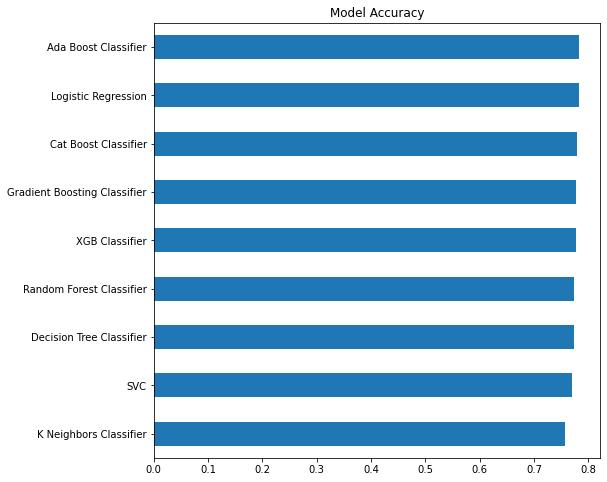

In [44]:
#Plot of accuracy of all models
%matplotlib inline
model_accuracy = pd.Series(data=[lr_ac,rf_ac, clf_ac,svr_ac, knn_ac,abc_ac,gb_clf_ac,xgb_clf_ac,cbr_ac], 
        index=['Logistic Regression','Random Forest Classifier','Decision Tree Classifier','SVC','K Neighbors Classifier','Ada Boost Classifier','Gradient Boosting Classifier','XGB Classifier','Cat Boost Classifier'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accuracy')

## Plot the ROC Curve

Next, we’ll calculate the true positive rate and the false positive rate and create a ROC curve for for all the models by using the Matplotlib data visualization package

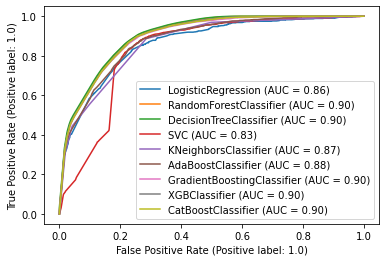

In [45]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay

#create ROC curve for all the models (stands for: “receiver operating characteristic” curve)

disp =  RocCurveDisplay.from_estimator(lr_c, X_test, y_test)

RocCurveDisplay.from_estimator(rf_clf, X_tr_smote, y_tr_smote, ax=disp.ax_);
RocCurveDisplay.from_estimator(clf, X_tr_smote, y_tr_smote, ax=disp.ax_);
RocCurveDisplay.from_estimator(svc_r, X_tr_smote, y_tr_smote, ax=disp.ax_);
RocCurveDisplay.from_estimator(knn, X_tr_smote, y_tr_smote, ax=disp.ax_);
RocCurveDisplay.from_estimator(abc, X_tr_smote, y_tr_smote, ax=disp.ax_);
RocCurveDisplay.from_estimator(gb_clf, X_tr_smote, y_tr_smote, ax=disp.ax_);
RocCurveDisplay.from_estimator(xgb_clf, X_tr_smote, y_tr_smote, ax=disp.ax_);
RocCurveDisplay.from_estimator(cbr, X_tr_smote, y_tr_smote, ax=disp.ax_);

### As we can see  Logistic Regression, Ada Boost and CatBoost are our best models.
